In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
m_df = pd.read_csv('movie.csv', index_col=0)

In [10]:
m_df.tail()

,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt,scrnCnt,showCnt,targetDate
3645,6,OLD,20176082,몬스터 패밀리,201204400,26393,350,479,20171231
3646,7,OLD,20176947,원더,171061300,20934,178,415,20171231
3647,8,OLD,20174846,뽀로로 극장판 공룡섬 대모험,109147200,13753,208,288,20171231
3648,9,OLD,20177479,극장판 프리파라 모두의 동경♪ 렛츠고☆프리파리,52851100,6633,183,291,20171231
3649,10,OLD,20170443,스타워즈: 라스트 제다이,39255300,3655,35,44,20171231


In [11]:
# 데이터셋의 정보 확인
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 0 to 3649
Data columns (total 9 columns):
rank             3650 non-null int64
rankOldAndNew    3650 non-null object
movieCd          3650 non-null int64
movieNm          3650 non-null object
salesAmt         3650 non-null int64
audiCnt          3650 non-null int64
scrnCnt          3650 non-null int64
showCnt          3650 non-null int64
targetDate       3650 non-null int64
dtypes: int64(7), object(2)
memory usage: 285.2+ KB


In [13]:
# targetDate를 날짜형으로 변경
m_df['targetDate'] = pd.to_datetime(m_df['targetDate'].astype(str), format="%Y%m%d")

In [15]:
# 일별 전체 관객수의 추이
group1 = m_df.groupby('targetDate')
group1.sum()

,rank,movieCd,salesAmt,audiCnt,scrnCnt,showCnt
targetDate,,,,,,
2017-01-01,55,201603916,9383458100,1079312,5247,15889
2017-01-02,55,201328813,3271078000,429079,4666,15103
2017-01-03,55,201601536,2665896600,354356,4704,14816
2017-01-04,55,201589734,3958350400,524319,5010,15626
2017-01-05,55,201589734,3581261900,472716,5240,15730
...,...,...,...,...,...,...
2017-12-27,55,201720762,6016724800,989145,4855,16365
2017-12-28,55,201722192,5496738200,739603,4788,16327
2017-12-29,55,201722021,8417211670,1017390,4877,16879


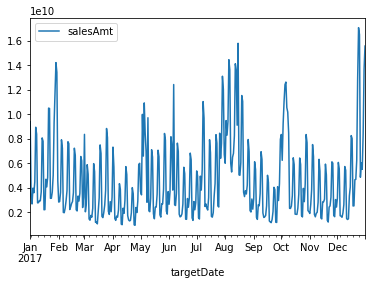

In [19]:
group1.sum().plot(y='salesAmt')
pass

In [22]:
m_df['target_m'] = m_df['targetDate'].dt.strftime('%Y%m')

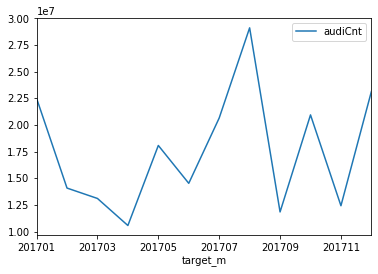

In [27]:
group2 = m_df.groupby('target_m')
group2.sum().plot(y='audiCnt')
pass

In [29]:
# 상관계수 연산하기
corr_matix = m_df.corr()

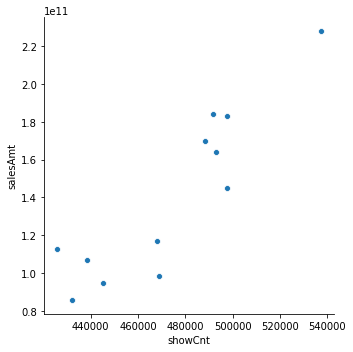

In [34]:
# 매출액과 상영횟수의 관계
sns.relplot(x='showCnt', y='salesAmt', data=group2.sum())
pass

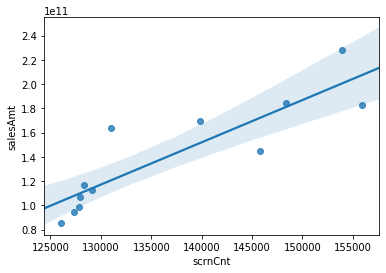

In [35]:
sns.regplot(x='scrnCnt', y='salesAmt', data=group2.sum())
pass

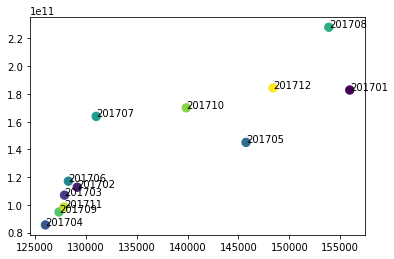

In [42]:
# plot의 옵션들
temp = group2.sum()
y = temp['salesAmt']
x = temp['scrnCnt']
n = temp.index


fig, ax = plt.subplots()
ax.scatter(x, y, s=70, c=range(len(n)))
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

In [44]:
# 2017년도 매출 상위 15개의 데이터로 데이터 분석 진행하기
b = m_df.groupby('movieNm').sum().sort_values('salesAmt', ascending=False)[0:15]
b

,rank,movieCd,salesAmt,audiCnt,scrnCnt,showCnt
movieNm,,,,,,
택시운전사,207,1189609271,95545284949,12143304,44942,182372
신과함께-죄와 벌,26,282113664,68327061432,8536277,19928,91291
공조,125,826200348,63558111526,7790214,33427,142172
스파이더맨: 홈 커밍,112,726022908,59030018920,7246799,35330,164188
범죄도시,219,1230537262,56143179749,6858989,38952,148636
군함도,115,564521468,50168516368,6545918,25033,107768
청년경찰,162,846822564,44037221416,5610249,27545,116219
더 킹,63,564234412,43262261835,5290359,25226,107257
미녀와 야수,136,988071329,41965874779,5118094,36067,139914


In [47]:
# 스크린 수 대비 관객수
b['audiCnt'] / b['scrnCnt']

movieNm
택시운전사          270.199457
신과함께-죄와 벌      428.355931
공조             233.051545
스파이더맨: 홈 커밍    205.117436
범죄도시           176.088237
군함도            261.491551
청년경찰           203.675767
더 킹            209.718505
미녀와 야수         141.905176
킹스맨: 골든 서클     212.902025
토르: 라그나로크      149.039096
강철비            225.784492
꾼              155.940662
남한산성           196.455258
미이라            169.866016
dtype: float64

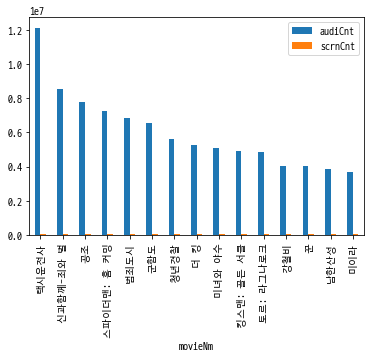

In [50]:
# 기본적으로 아나콘다에는 한글 폰트가 없다. 따라서 설정을 해줘야 한다.
plt.rcParams['font.family'] = 'D2coding'
b.plot.bar(y=['audiCnt','scrnCnt'])
# 스크린 수의 수치가 너무 작아서
# 매출액이나 관객수와 동시에 표시하는 경우에는 좋은 시각화가 될 수 없다.
pass

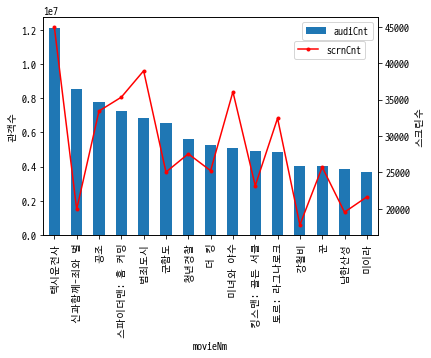

In [56]:
# plot 2가지를 생성해서 레이어에 표시하기
b.plot.bar(y='audiCnt')
plt.ylabel('관객수')

# twinx 이후에 나오는 코딩으로 우측에 해당하는 그래프를 그린다.
plt.twinx()
plt.plot(b['scrnCnt'], 'r.-', label='scrnCnt')
plt.ylabel('스크린수')
plt.legend(loc=(.75, 0.81))
pass